In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv('climate.csv')
print("Shape\n",df.shape)
print("Columns\n",df.columns)
df.head()

Shape
 (1000, 10)
Columns
 Index(['Year', 'Country', 'Avg Temperature (°C)',
       'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)', 'Rainfall (mm)',
       'Population', 'Renewable Energy (%)', 'Extreme Weather Events',
       'Forest Area (%)'],
      dtype='object')


,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
0,2000,India,20.9,15.9,2.6,1100,1237433800,26.4,8,61.3
1,2000,UK,22.9,13.7,4.7,1255,1366969728,33.4,12,41.2
2,2000,USA,9.9,3.7,2.5,2067,739358801,9.5,7,64.7
3,2000,Brazil,31.2,14.6,3.7,803,255339962,28.3,9,21.7
4,2000,UK,17.1,13.4,2.0,754,343373633,16.0,11,69.8


In [ ]:
print("Missing Values\n",df.isnull().sum())
print("Summary Stats\n",df.describe())

Missing Values
 Year                           0
Country                        0
Avg Temperature (°C)           0
CO2 Emissions (Tons/Capita)    0
Sea Level Rise (mm)            0
Rainfall (mm)                  0
Population                     0
Renewable Energy (%)           0
Extreme Weather Events         0
Forest Area (%)                0
dtype: int64
Summary Stats
               Year  Avg Temperature (°C)  CO2 Emissions (Tons/Capita)  \
count  1000.000000           1000.000000                  1000.000000   
mean   2011.432000             19.883100                    10.425800   
std       7.147199              8.542897                     5.614665   
min    2000.000000              5.000000                     0.500000   
25%    2005.000000             12.175000                     5.575000   
50%    2012.000000             20.100000                    10.700000   
75%    2018.000000             27.225000                    15.400000   
max    2023.000000             34.900000  

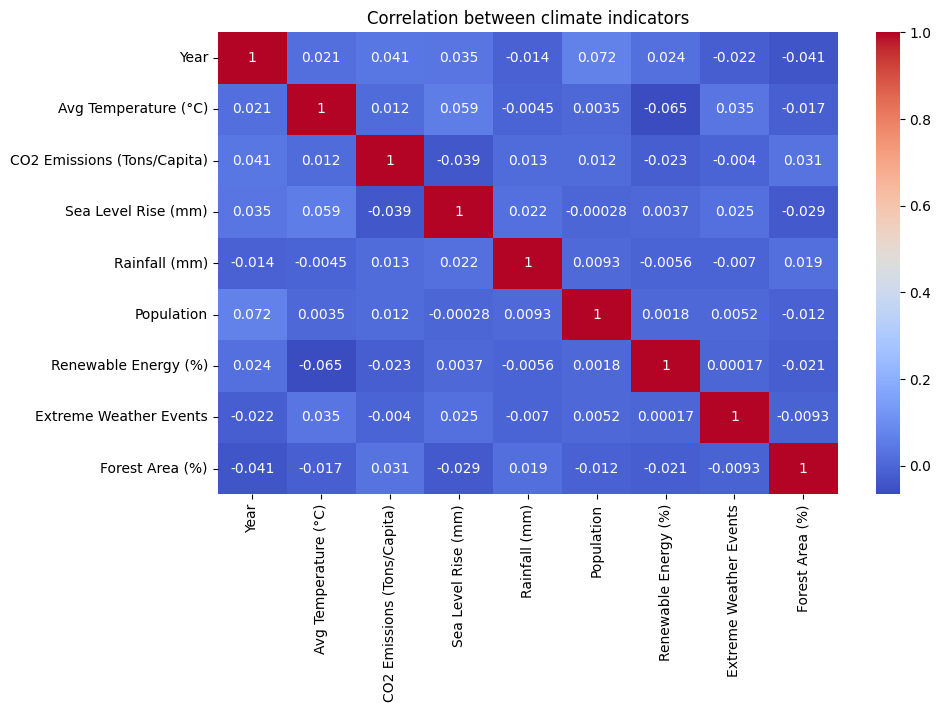

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation between climate indicators")
plt.show()

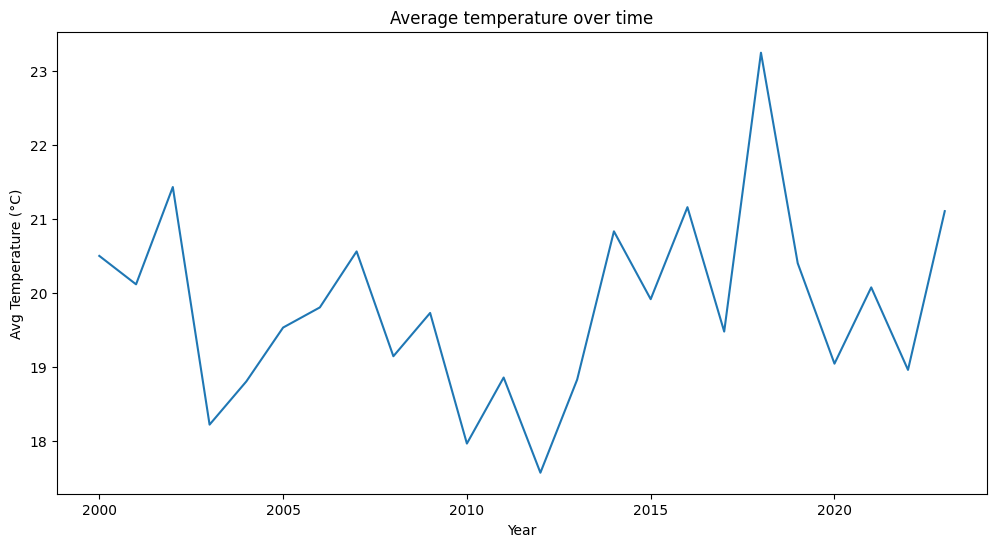

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x="Year",y="Avg Temperature (°C)",data=df,ci=None)
plt.title("Average temperature over time")
plt.show()

In [ ]:
df=df.dropna()

In [ ]:
X=df[["CO2 Emissions (Tons/Capita)",
    "Sea Level Rise (mm)",
    "Rainfall (mm)",
    "Population",
    "Renewable Energy (%)",
    "Extreme Weather Events",
    "Forest Area (%)"]]
y=df["Avg Temperature (°C)"]
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)
x_train, x_test, y_train, y_test= train_test_split(x_scaled, y, train_size=0.2, random_state=42)

In [ ]:
models={
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}
results={}
for name, model in models.items():
  model.fit(x_train, y_train)
  y_pred=model.predict(x_test)
  mae=mean_absolute_error(y_test,y_pred)
  mse=mean_squared_error(y_test,y_pred)
  r2=r2_score(y_test,y_pred)
  results[name]={"MAE":mae,"MSE":mse,"R2":r2}
  print(f"\n{name} Performance:")
  print(f"MAE: {mae:.3f},MSE:{mse:.3f},R2:{r2:.3f}")


Linear Regression Performance:
MAE: 7.487,MSE:76.184,R2:-0.044

Random Forest Performance:
MAE: 7.784,MSE:83.857,R2:-0.149

Gradient Boosting Performance:
MAE: 8.005,MSE:92.111,R2:-0.262


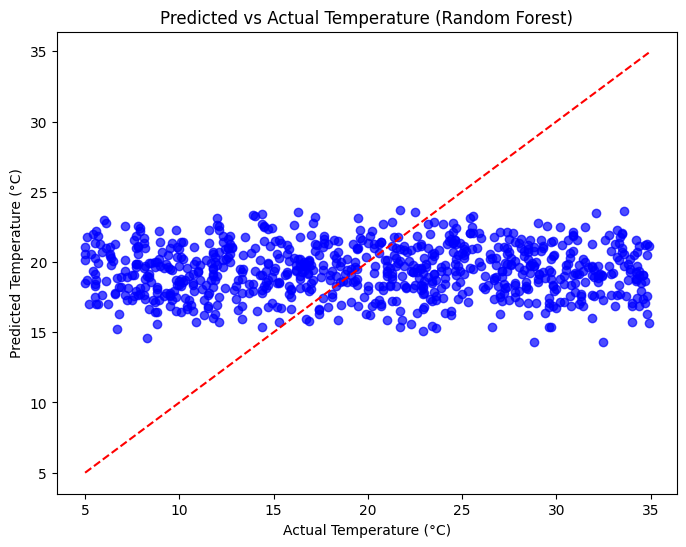

In [ ]:
best_model=LinearRegression()
best_model.fit(x_train,y_train)
y_pred_best=best_model.predict(x_test)
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred_best,alpha=0.7,color="blue")
plt.plot([y.min(),y.max()],[y.min(),y.max()],'r--')
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Predicted vs Actual Temperature (Random Forest)")
plt.show()

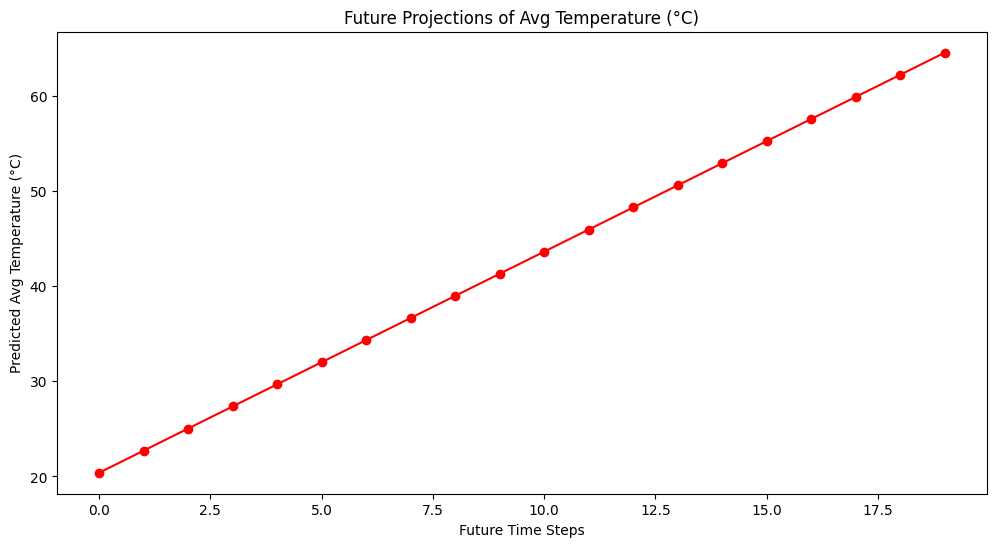

In [ ]:
future_data = pd.DataFrame({
    "CO2 Emissions (Tons/Capita)": np.linspace(df["CO2 Emissions (Tons/Capita)"].max(), df["CO2 Emissions (Tons/Capita)"].max()+5, 20),
    "Sea Level Rise (mm)": np.linspace(df["Sea Level Rise (mm)"].max(), df["Sea Level Rise (mm)"].max()+100, 20),
    "Rainfall (mm)": df["Rainfall (mm)"].mean(),
    "Population": df["Population"].mean(),
    "Renewable Energy (%)": df["Renewable Energy (%)"].mean(),
    "Extreme Weather Events": df["Extreme Weather Events"].mean(),
    "Forest Area (%)": df["Forest Area (%)"].mean()
})

future_scaled = scaler.transform(future_data)
future_predictions = best_model.predict(future_scaled)

plt.figure(figsize=(12,6))
plt.plot(range(len(future_predictions)), future_predictions, marker="o", color="red")
plt.title("Future Projections of Avg Temperature (°C)")
plt.xlabel("Future Time Steps")
plt.ylabel("Predicted Avg Temperature (°C)")
plt.show()